In [1]:
from nn import *
from loss import loss_mapper
from viz import plot_history
from metrics import accuracy
from callbacks import EarlyStopping
from tools import train_test_split, load, save, binary_encoder

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
y, ohe_map = binary_encoder(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.33, random_state=42)

In [7]:
ohe_map

{0: 'B', 1: 'M'}

In [8]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [9]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

In [10]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='gd', verbose=True, verbose_step=25)
model.add(Dense(30, activation=Relu(), dropout_rate=.25))
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))

In [11]:
es = EarlyStopping(monitor='val_loss', patience=300)

In [12]:
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=1000, batch_size=32, callbacks=[es], metrics=[accuracy], reinitialize=False)

[   25/1000]: loss=0.65325 val_loss=0.67197 accuracy=0.63947 val_accuracy=0.60638 
[   50/1000]: loss=0.58306 val_loss=0.60398 accuracy=0.65000 val_accuracy=0.62234 
[   75/1000]: loss=0.06739 val_loss=0.09104 accuracy=0.98158 val_accuracy=0.97340 
[  100/1000]: loss=0.05331 val_loss=0.08194 accuracy=0.98158 val_accuracy=0.97872 
[  125/1000]: loss=0.04480 val_loss=0.08869 accuracy=0.98947 val_accuracy=0.97340 
[  150/1000]: loss=0.03627 val_loss=0.09777 accuracy=0.98947 val_accuracy=0.97340 
[  175/1000]: loss=0.02931 val_loss=0.11189 accuracy=0.99211 val_accuracy=0.96277 
[  200/1000]: loss=0.02317 val_loss=0.12712 accuracy=0.99211 val_accuracy=0.96277 
[  225/1000]: loss=0.01836 val_loss=0.14302 accuracy=0.99211 val_accuracy=0.95745 
[  250/1000]: loss=0.01526 val_loss=0.15107 accuracy=0.99474 val_accuracy=0.95213 
[  275/1000]: loss=0.01239 val_loss=0.17254 accuracy=0.99474 val_accuracy=0.95745 
[  300/1000]: loss=0.00995 val_loss=0.19522 accuracy=0.99737 val_accuracy=0.95745 
[  3

In [13]:
accuracy(y_test, model.predict(X_test_normed))

0.9574468085106383

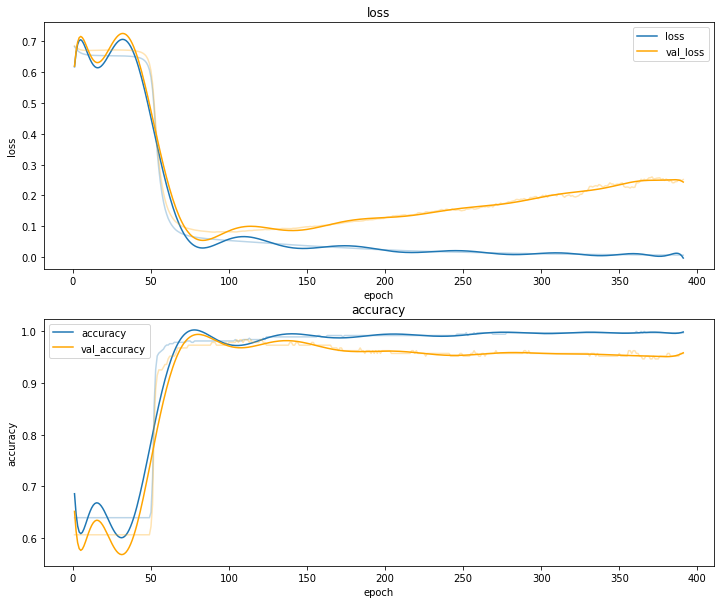

In [14]:
plot_history(h)

In [23]:
rmodel = NeuralNetwork(loss='binary_crossentropy', optimizer='gd', verbose=True, verbose_step=250)
rmodel.add(Dense(30, activation=Relu(), dropout_rate=.25, weights_regularizer=L1Regularizer(.1)))
rmodel.add(Dense(30, 'relu', weights_regularizer=L2Regularizer(.3)))
rmodel.add(Dense(1, activation=Sigmoid(), bias_regularizer=L1Regularizer(.3)))

h = rmodel.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10000, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
accuracy(y_test, rmodel.predict(X_test_normed))

[  250/10000]: loss=0.65384 val_loss=0.67176 accuracy=0.63947 val_accuracy=0.60638 
[  500/10000]: loss=0.65379 val_loss=0.67192 accuracy=0.63947 val_accuracy=0.60638 
[  750/10000]: loss=0.30927 val_loss=0.33548 accuracy=0.94737 val_accuracy=0.93617 
[ 1000/10000]: loss=0.06560 val_loss=0.08929 accuracy=0.97105 val_accuracy=0.96809 
[ 1250/10000]: loss=0.06325 val_loss=0.08327 accuracy=0.98158 val_accuracy=0.97340 
[ 1500/10000]: loss=0.06386 val_loss=0.08087 accuracy=0.97632 val_accuracy=0.97340 
[ 1750/10000]: loss=0.06211 val_loss=0.07497 accuracy=0.97895 val_accuracy=0.97872 
[ 2000/10000]: loss=0.06218 val_loss=0.07528 accuracy=0.97895 val_accuracy=0.97872 
[ 2250/10000]: loss=0.06078 val_loss=0.07355 accuracy=0.97895 val_accuracy=0.97872 
[ 2500/10000]: loss=0.09051 val_loss=0.11581 accuracy=0.97105 val_accuracy=0.94681 
[ 2750/10000]: loss=0.17382 val_loss=0.20215 accuracy=0.94737 val_accuracy=0.92021 
[ 3000/10000]: loss=0.69432 val_loss=0.71014 accuracy=0.57105 val_accuracy=0

0.9308510638297872